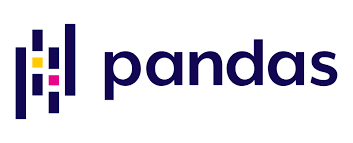

## [53] Membuat Kategori Baru Berdasarkan Treshold (ambang batas)

### [53.1] Import Module

In [1]:
import pandas as pd
print(pd.__version__)

1.0.5


### [53.2] Persiapan Data Frame
- Data frame yang dibentuk merupakan data frame yang terdiri dari 1 kolom yang berisikan nama-nama hobi
- Setiap jenis hobi akan dikelompokkan dan dihitung proporsinya

In [2]:
d = {'hobi':['jogging','mancing','renang',
            'mancing','mancing','baca','baca',
            'mancing','fotografi','mancing','camping']}
df = pd.DataFrame(d)
df

,hobi
0,jogging
1,mancing
2,renang
3,mancing
4,mancing
5,baca
6,baca
7,mancing
8,fotografi
9,mancing


### [53.3] Membuat Kategori Baru berdasarkan Treshold (ambang batas)
- Untuk menghitung jumlah kemunculan dari masing-masing kolom digunakan fungsi .value_counts()
- Untuk menghitung jumlah kemunculan dari masing-masing kolom dan ditampilkan dalam bentuk persentase maka pada parameter normalize di .value_counts diberi nilai true
- Pada variabel hobi lain, nama-nama hobi dengan persentase lebih kecil dari 10% akan digabung dan dikelompokkan dengan nama hobi lain
- Penggunaan .index pada saat pengelompokkan bertujuan untuk menyimpan label dari nama-nama hobi, bukan nilai
- Fungsi replace digunakan untuk mengganti setiap hobi yang masuk ke dalam kategori hobi lain menjadi 'lainnya'

In [3]:
df['hobi'].value_counts()

mancing      5
baca         2
renang       1
camping      1
jogging      1
fotografi    1
Name: hobi, dtype: int64

In [5]:
persentase = df['hobi'].value_counts(normalize=True)
persentase

mancing      0.454545
baca         0.181818
renang       0.090909
camping      0.090909
jogging      0.090909
fotografi    0.090909
Name: hobi, dtype: float64

In [6]:
treshold = 0.1
hobi_lain = persentase[persentase<treshold].index
hobi_lain

Index(['renang', 'camping', 'jogging', 'fotografi'], dtype='object')

In [7]:
df['hobi'] = df['hobi'].replace(hobi_lain,'lainnya')
df['hobi']

0     lainnya
1     mancing
2     lainnya
3     mancing
4     mancing
5        baca
6        baca
7     mancing
8     lainnya
9     mancing
10    lainnya
Name: hobi, dtype: object

In [8]:
df['hobi'].value_counts(normalize = True)

mancing    0.454545
lainnya    0.363636
baca       0.181818
Name: hobi, dtype: float64

## [54] Menyimpan Data Frame sebagai File CSV

### [54.1] Import Module

In [1]:
import pandas as pd
print (pd.__version__)

1.0.5


### [54.2] Persiapan Data Frame

In [2]:
data = {'nama':['bayu','indra','devi','agni'],
       'jenis_kelamin':['L','L','P','L'],
       'usia':[23,21,22,25]}
df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


### [54.3] Menyimpan Data Frame Sebagai File CSV
- Penyimpnan data frame ke dalam file CSV dapat dilakukan dengan method to_csv()
- Untuk pembelajaran materi ini disarankan untuk memakai jupyterlab dikarenakan lebih mudah untuk melihat terbentuknya file csv secara langsung

In [8]:
df.to_csv('data_peserta.csv')

In [11]:
df = pd.read_csv('data_peserta.csv',index_col = 0)
df

,jenis_kelamin,usia
nama,,
bayu,L,23
indra,L,21
devi,P,22
agni,L,25


In [10]:
df.to_csv('data_peserta.csv',index=False)
df = pd.read_csv('data_peserta.csv')
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


## [55] Menghitung Jumlah Baris Menurut Kriteria Tertentu

### [55.1] Import Module

In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [55.2] Persiapan Data Frame
- Data Frame yang dibentuk merupakan data frame yang terdiri dari 10 baris dan 5 kolom
- Isi data pada Data Frame merupakan angka random yang dimulai dari angka 1 dan diakhiri dengan angka 10

In [2]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10,size=(n_rows,n_cols)),columns=cols)
df

,A,B,C,D,E
0,7,3,7,3,5
1,5,3,9,5,2
2,7,1,4,4,9
3,4,4,3,6,1
4,6,3,4,2,3
5,7,4,2,7,9
6,6,2,5,2,3
7,8,9,1,9,6
8,8,6,2,2,9
9,4,9,3,6,8


### [55.3] Menghitung jumlah baris menurut kriteria tertentu
- Untuk menghitung jumlah baris data pada data frame yang bernilai <5 digunakan .sum()
- Untuk menghitung persentase / proporsi nilai < 5 terhadap keseluruhan data pada data frame digunakan .mean() 

In [3]:
(df['A']<5).sum()

2

In [4]:
(df['A']<5).mean()

0.2

## [56] Mengeluarkan Kolom dari Data Frame

### [56.1] Import Module

In [5]:
import pandas as pd
print(pd.__version__)

1.0.5


### [56.2] Persiapan Data Frame

In [6]:
data = {'nama':['bayu','indra','devi','agni'],
       'jenis_kelamin':['L','L','P','L'],
       'usia':[23,21,22,25]}
df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


### [56.3] Mengeluarkan kolom dari Data Frame